# RGB and HSV Color Space


RGB color values can be directly used as 3D coordinate to plot RGB color space

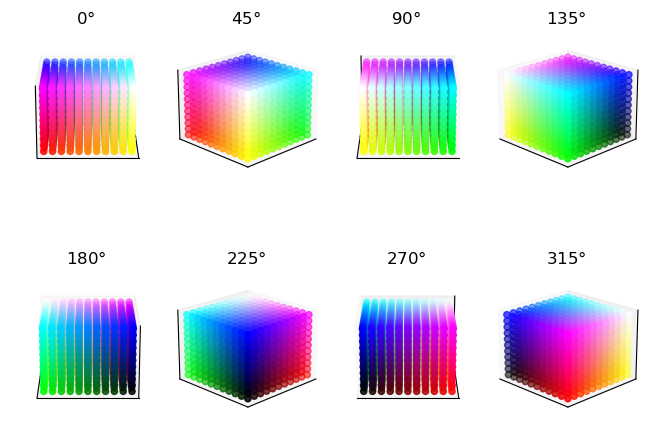

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

xs = np.linspace(0, 1, 11)
ys = np.linspace(0, 1, 11)
zs = np.linspace(0, 1, 11)
xs, ys, zs = (a.reshape(-1) for a in np.meshgrid(xs, ys, zs, indexing='ij'))
cs = np.vstack((xs,ys,zs)).T

fig, axs = plt.subplots(2, 4, layout="constrained", subplot_kw=dict(projection="3d"))

for i in range(0, 8):
    ix = int(i % 4)
    iy = int(i / 4)
    ax = axs[iy, ix]
    ax.scatter(xs, ys, zs, c=cs)
    ax.view_init(elev=20., azim=i * 45)
    ax.set_title(f"{i*45}$\degree$")
    ax.xaxis.set_major_locator(ticker.NullLocator())
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.zaxis.set_major_locator(ticker.NullLocator())

function $HSV(r, g, b)$ that maps normalized RGB color($\mathbb{R}^3$) to HSV color($\mathbb{R}^3$) is defined as follows:
$$
\text{let }r, g, b \in [0, 1]\\
m = \max(r, g, b)\\
n = \min(r, g, b)\\
$$
$$
\text{then }HSV(r,g,b) : \mathbb{R}^3 \mapsto \mathbb{R}^3 = \begin{bmatrix}h&s&v\end{bmatrix}^T \text{ such that}\\[2em]
$$
$$
h = \begin{cases}
    0\degree &\text{ if } m=n\\
    60\degree\times(\frac{g-b}{m-n}\mod{6})&\text{ if }m = r\\
    60\degree\times(\frac{b-r}{m-n}+2)&\text{ if } m=g\\
    60\degree\times(\frac{g-b}{m-n}+4)&\text{ if } m=b\\
    \end{cases}\\[1.5em]
$$
$$
s = \begin{cases}
    0&\text{ if } m = 0\\
    \frac{m-n}{m}&\text{ if } m \neq 0
\end{cases}\\[1.5em]
$$
$$
v = m\\
$$
$$
\text{where } h \in [0\degree, 360\degree]\text{ and }s, v \in [0, 1]
$$

In [3]:
def hsv_from_rgb(r, g, b):
    m = max(r, g, b)
    n = min(r, g, b)
    if  m == n: h = 0.0
    elif m == r: h = 60.0 * (((g-b)/(m-n)) % 6.0)
    elif m == g: h = 60.0 * ((b-r)/(m-n) + 2.0)
    elif m == b: h = 60.0 * ((r-g)/(m-n) + 4.0)
    if m == 0: s = 0
    else: s = (m-n)/m
    v = m
    return h, s, v

function RGB(h, s, v) that maps HSV color($\mathbb{R}^3$) to normalized RGB color($\mathbb{R}^3$) is defined as follows:
$$
\begin{array}{l}
\text{ let } h\in[0,360)\degree\text{ and } s, v \in [0,1]\\
\text{ and let } c = v \times s\\
\text{ and let } x = c \times (1-|(h/60°)\mod{2} - 1|)\\
\text{ and let } m = v - c \\
\end{array}\\[2em]
$$

$$
\text {then }
$$

$$
RGB(h, s, l): \mathbb{R}^3\mapsto\mathbb{R}^3 = \begin{bmatrix}r\\ g \\ b\end{bmatrix}=\begin{bmatrix}m \\ m \\ m\end{bmatrix} + \begin{cases}
\begin{bmatrix}c&x&0\end{bmatrix}^T&\text{ if } h < 60\degree\\
\begin{bmatrix}x&c&0\end{bmatrix}^T&\text{ if } h < 120\degree\\
\begin{bmatrix}0&c&x\end{bmatrix}^T&\text{ if } h < 180\degree\\
\begin{bmatrix}0&x&c\end{bmatrix}^T&\text{ if } h < 240\degree\\
\begin{bmatrix}x&0&c\end{bmatrix}^T&\text{ if } h < 300\degree\\
\begin{bmatrix}c&0&x\end{bmatrix}^T&\text{ if } h < 360\degree\\
\end{cases} \\
$$

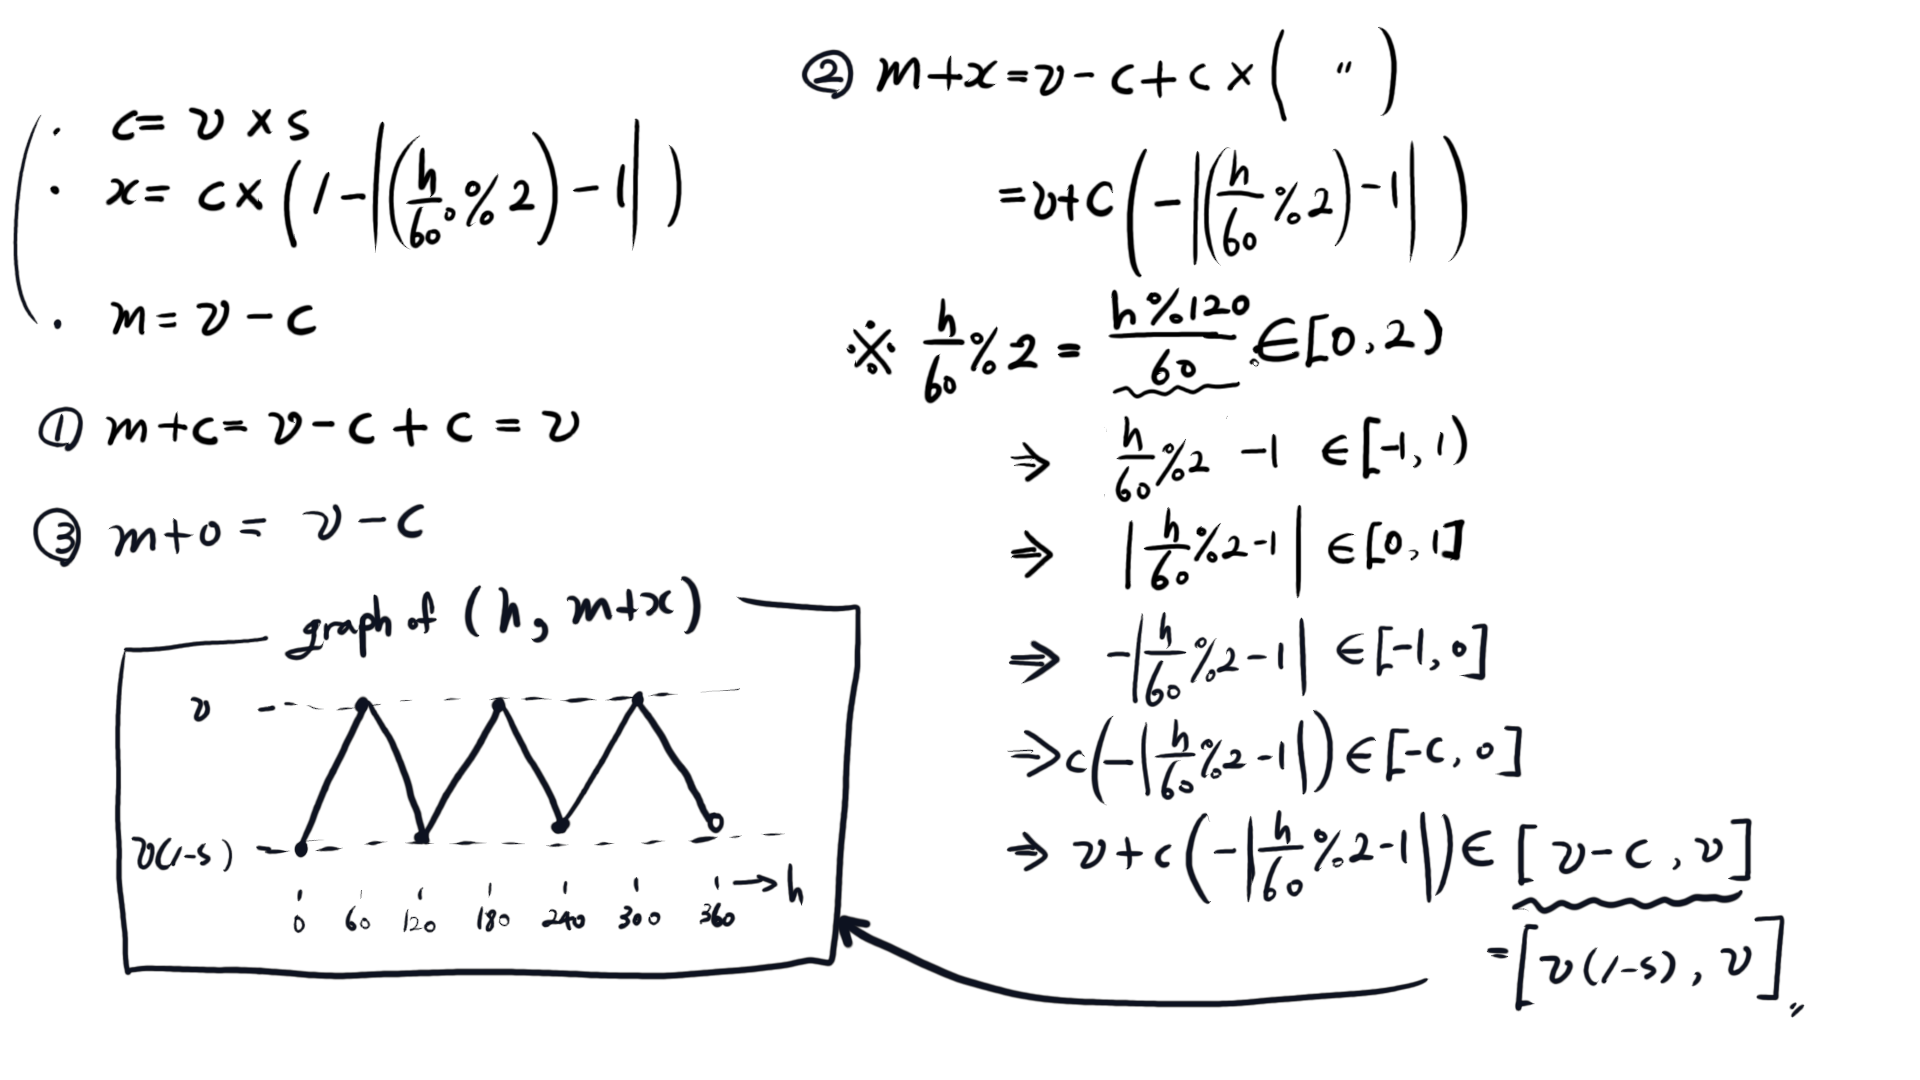

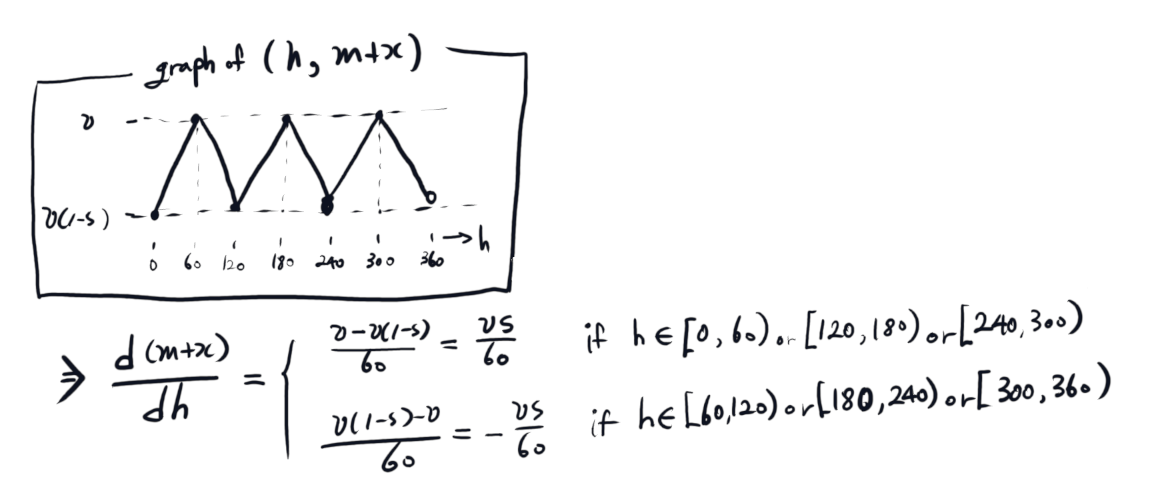

that is, the following relationship holds among rgb values and hsv values depending on which sector h value is located:

| h | r                | g             | b                |
| ------- | ---------------- | ------------- | ---------------- |
| 0~60    | $=v$              | $\propto hvs$ | $\propto v(1-s)$ |
| 60~120  | $\propto -hvs$    | $=v$           | $\propto v(1-s)$ |
| 120~180 | $\propto v(1-s)$ | $=v$           | $\propto hvs$    |
| 180~240 | $\propto v(1-s)$ | $\propto -hvs$ | $=v$              |
| 240~300 | $\propto hvs$    | $\propto v(1-s)$           | $=v$ |
| 300~360 | $=v$              | $\propto v(1-s)$ | $\propto -hvs$ |

In [4]:
def rgb_from_hsv(h, s, v):
    h = h % 360
    c = v * s
    x = c * (1 - abs(h/60 % 2 - 1))
    m = v - c
    if h < 60: return (c + m, x + m, m)
    if h < 120: return (x + m, c + m, m)
    if h < 180: return (m, c + m, x + m)
    if h < 240: return (m, x + m, c + m)
    if h < 300: return (x + m, m, c + m)
    if h < 360: return (c + m, m, x + m)
    raise ValueError(h)


To plot HSV color space, we will map hsv value into 3D cartesian coordinates, which plots cylinder shape:

$$
XYZ(h, s, v) : \mathbb{R}^3 \mapsto \mathbb{R}^3 = \begin{bmatrix}x\\ y\\ z\end{bmatrix}=\begin{bmatrix}
s \times \cos(h / 180.0 * \pi)\\
s \times \sin(h / 180.0 * \pi)\\
v\\
\end{bmatrix}
$$

In [5]:
import math

def xyz_from_hsv(h, s, v):
    x = s * math.cos(math.radians(h))
    y = s * math.sin(math.radians(h))
    z = v
    return (x, y, z)

If we sample RGB value linearly and map them into HSV cylinder, the precision of saturation drops as $v=(m-n)/m$ approachs $0$.

0.78125


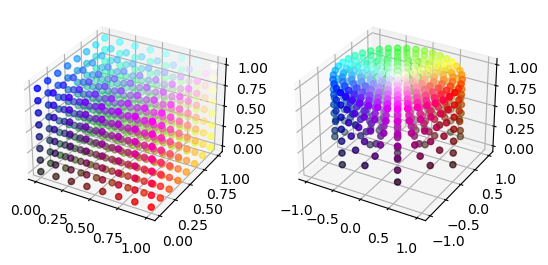

In [6]:
rs = np.linspace(0, 1, 8)
gs = np.linspace(0, 1, 8)
bs = np.linspace(0, 1, 8)

rr, gg, bb = (x.reshape(-1) for x in np.meshgrid(rs, gs, bs, indexing='ij'))
hh, ss, vv = np.vectorize(hsv_from_rgb, otypes=[float, float, float])(rr, gg, bb)
xs, ys, zs = np.vectorize(xyz_from_hsv, otypes=[float, float, float])(hh, ss, vv)
cs = np.column_stack((rr, gg, bb))

fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection="3d"))
axs[0].scatter(rr, gg, bb, c=cs)
axs[1].scatter(xs, ys, zs, c=cs)

print(np.average(zs))

Instead, we can sample $h, s, l$ linearly to plot pretty looking cylinder:

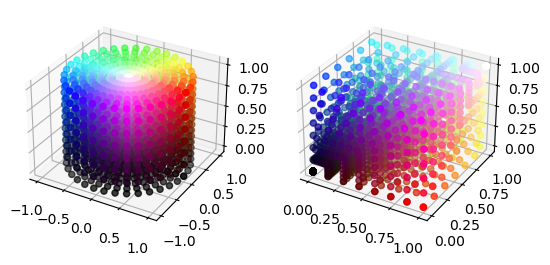

In [7]:
hl = np.linspace(0, 360, 36)
sl = np.linspace(0, 1, 8)
vl = np.linspace(0, 1, 8)

hh, ss, vv = (x.reshape(-1) for x in np.meshgrid(hl, sl, vl, indexing='ij'))
xs, ys, zs = np.vectorize(xyz_from_hsv, otypes=[float, float, float])(hh, ss, vv)
cs = np.vstack(np.vectorize(rgb_from_hsv, otypes=[float, float, float])(hh, ss, vv)).T

fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection="3d"))
ax[0].scatter(xs, ys, zs, c=cs)
ax[1].scatter(cs[:,0], cs[:,1], cs[:,2], c=cs)


The level sets of graph $(s\times\cos{h}, s\times\sin{h}, v)$ along the value $v = z$ is called rgb color wheel.

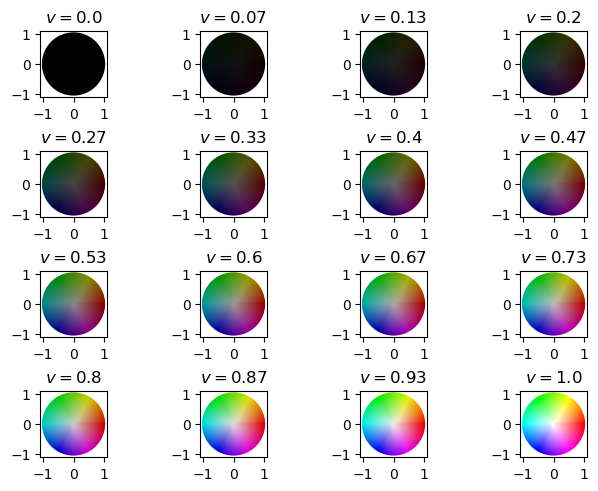

In [8]:
hl = np.linspace(0, 360, 120)
sl = np.linspace(0, 1, 16)

fig, axs = plt.subplots(4, 4, layout="constrained")
for i in range(16):
    v = round(i / 15.0, 2)
    hh, ss = (x.reshape(-1) for x in np.meshgrid(hl, sl, indexing='ij'))
    xx, yy, zz = np.vectorize(lambda h, s : xyz_from_hsv(h, s, v))(hh, ss)
    rr, gg, bb = np.vectorize(lambda h, s : rgb_from_hsv(h, s, v))(hh, ss)
    cs = np.column_stack((rr, gg, bb))
    ax = axs[int(i/4), int(i%4)]
    ax.set_aspect(1)
    ax.scatter(xx, yy, c = cs, s = 1)
    ax.set_title(f'$v=${v}')


Also note that $3v^2 = A$, wherer $A$ is area of RGB subspace represented by the color wheel at $v$

i       v       area        area:(v^2)      
0       0.0     0.0         -               
1       0.07    0.0147      3.0             
2       0.13    0.0507      3.0             
3       0.2     0.12        3.0             
4       0.27    0.2187      3.0             
5       0.33    0.3267      3.0             
6       0.4     0.48        3.0             
7       0.47    0.6627      3.0             
8       0.53    0.8427      3.0             
9       0.6     1.08        3.0             
10      0.67    1.3467      3.0             
11      0.73    1.5987      3.0             
12      0.8     1.92        3.0             
13      0.87    2.2707      3.0             
14      0.93    2.5947      3.0             
15      1.0     3.0         3.0             


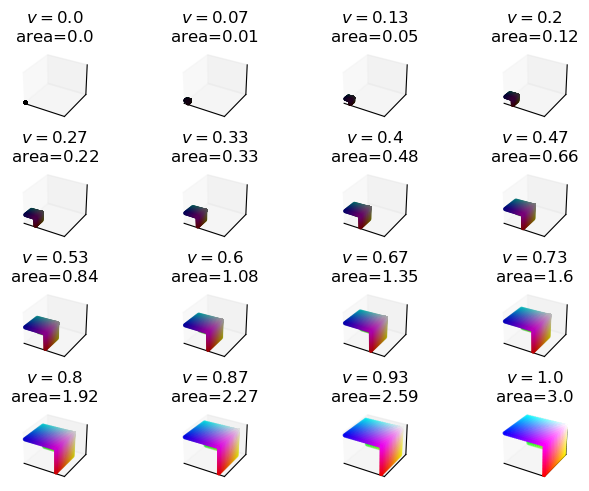

In [9]:
hl = np.linspace(0, 360, 120)
sl = np.linspace(0, 1, 16)

fig, axs = plt.subplots(4, 4, layout="constrained", subplot_kw=dict(projection='3d'))
FMT = "{0: <8}{1: <8}{2: <12.8}{3: <16.10}"
print(FMT.format('i', 'v', 'area', 'area:(v^2)'))
for i in range(16):
    v = round(i / 15.0, 2)
    hh, ss = (x.reshape(-1) for x in np.meshgrid(hl, sl, indexing='ij'))
    rr, gg, bb = np.vectorize(lambda h, s : rgb_from_hsv(h, s, v))(hh, ss)
    dr = (np.max(rr) - np.min(rr))
    dg = (np.max(gg) - np.min(gg))
    db = (np.max(bb) - np.min(bb))
    area = dr * dg + dg * db + db * dr
    if i == 0:
        print(FMT.format(i, v, area, '-'))
    if i != 0:
        print(FMT.format(i, v, area, area/(v**2)))
    cs = np.column_stack((rr, gg, bb))
    ax = axs[int(i/4), int(i%4)]
    ax.set_xlim(left=0, right=1)
    ax.set_ylim(bottom=0, top=1)
    ax.set_zlim(bottom=0, top=1)
    ax.scatter(rr, gg, bb, c = cs, s = 3)
    ax.set_title(f'$v=${v}\narea=${round(area, 2)}$')
    ax.xaxis.set_major_locator(ticker.NullLocator())
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.zaxis.set_major_locator(ticker.NullLocator())

The level sets of graph $(s\times\cos{h}, s\times\sin{h}, v)$ along the value $v = z$ can be properly plotted as polar coordainte graph. $(\theta, r) = (h, s)$

Text(0.5, 1.0, '$v=1$')

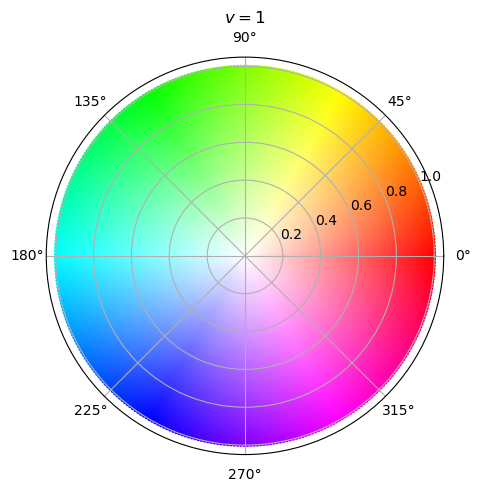

In [10]:
hl = np.linspace(0, 360, 360)
sl = np.linspace(0, 1, 120)

fig, ax = plt.subplots(layout="constrained", subplot_kw = {'projection' : 'polar'})
hh, ss = (x.reshape(-1) for x in np.meshgrid(hl, sl, indexing='ij'))
rr, gg, bb = np.vectorize(lambda h, s : rgb_from_hsv(h, s, 1))(hh, ss)
cs = np.column_stack((rr, gg, bb))
ax.set_aspect(1)
ax.scatter(np.deg2rad(hh), ss, c = cs, s = 3)
ax.set_title(f'$v=1$')

RGB wheel is partitioned into 6 sectors, each sector have meausre of angle $60\degree$.

Notice that on the first section of $h \in [0,60]\degree$, the following properties hold truth:

- red component never changes.
- green component is affected by both hue and saturation.
- blue component is affected by saturation.

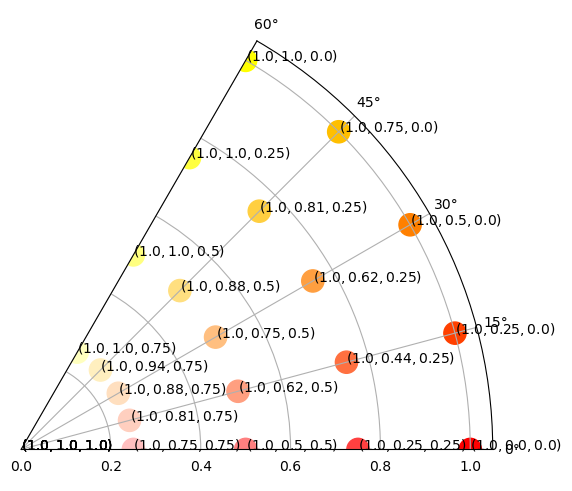

In [11]:
def rgb_wheel_part(hbeg, hend):
    hl = np.linspace(hbeg, hend, 5)
    sl = np.linspace(0, 1, 5)

    _, ax = plt.subplots(layout="constrained", subplot_kw = {'projection' : 'polar'})
    hh, ss = (x.reshape(-1) for x in np.meshgrid(hl, sl, indexing='ij'))
    rr, gg, bb = np.vectorize(lambda h, s : rgb_from_hsv(h, s, 1))(hh, ss)
    cs = np.column_stack((rr, gg, bb))
    ax.set_xticks(np.deg2rad(np.linspace(hbeg, hend, 5, endpoint=True)))
    ax.set_thetamin(hbeg)
    ax.set_thetamax(hend)
    ax.scatter(np.vectorize(math.radians)(hh), ss, c = cs, s = 256)
    for h in np.linspace(hbeg, hend, 5):
        for s in np.linspace(0, 1, 5):
            r, g, b = np.vectorize(round)(rgb_from_hsv(h, s, 1), 2)
            text = f"$({r}, {g}, {b})$"
            ax.annotate(
                text, 
                (math.radians(h), s),
            )
rgb_wheel_part(0, 60)

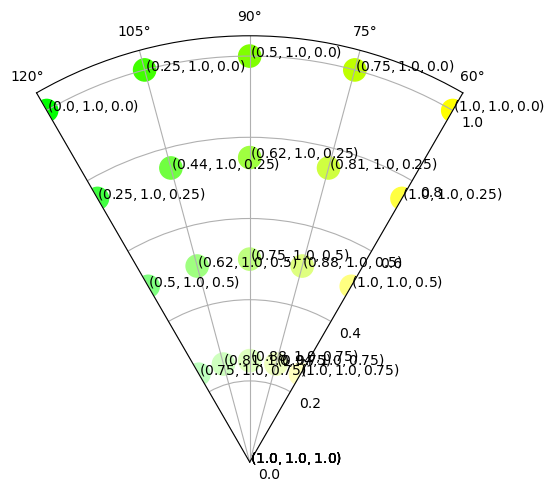

In [12]:
rgb_wheel_part(60, 120)

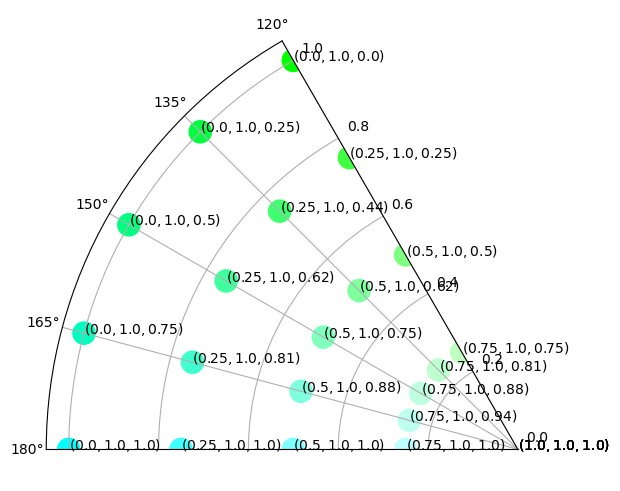

In [13]:
rgb_wheel_part(120, 180)

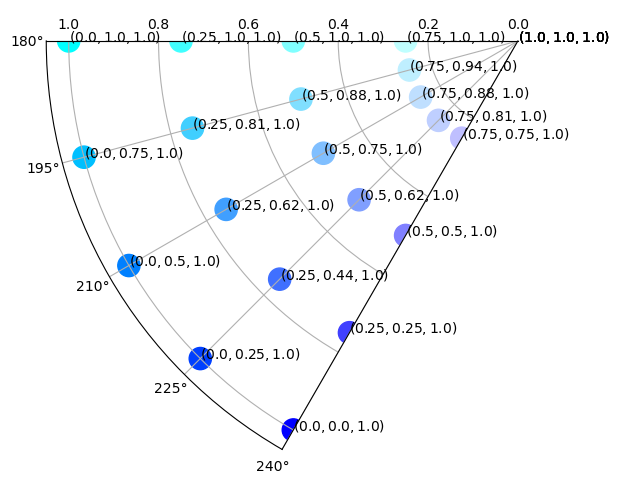

In [14]:
rgb_wheel_part(180, 240)

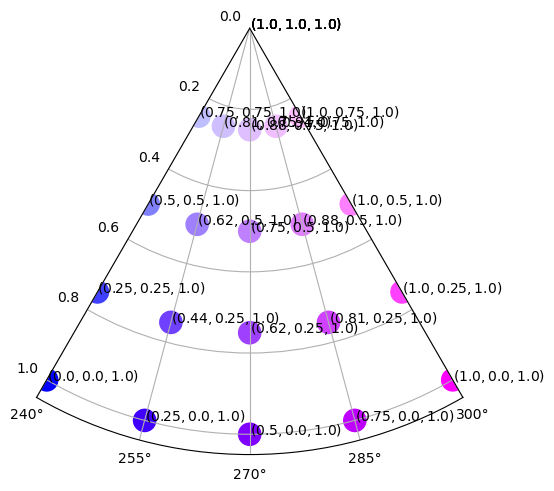

In [15]:
rgb_wheel_part(240, 300)

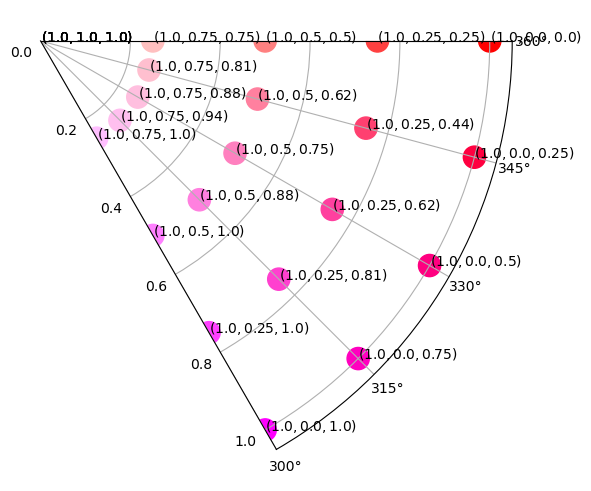

In [16]:
rgb_wheel_part(300, 360)

Their properties on each sector can be summarized with the table with $v=1$

| h | r                | g             | b                |
| ------- | ---------------- | ------------- | ---------------- |
| 0~60    | $=1$              | $\propto hs$ | $\propto (1-s)$ |
| 60~120  | $\propto -hs$    | $=1$           | $\propto (1-s)$ |
| 120~180 | $\propto (1-s)$ | $=1$           | $\propto hs$    |
| 180~240 | $\propto (1-s)$ | $\propto -hs$ | $=1$              |
| 240~300 | $\propto hs$    | $\propto (1-s)$           | $=1$ |
| 300~360 | $=1$              | $\propto (1-s)$ | $\propto -hs$ |

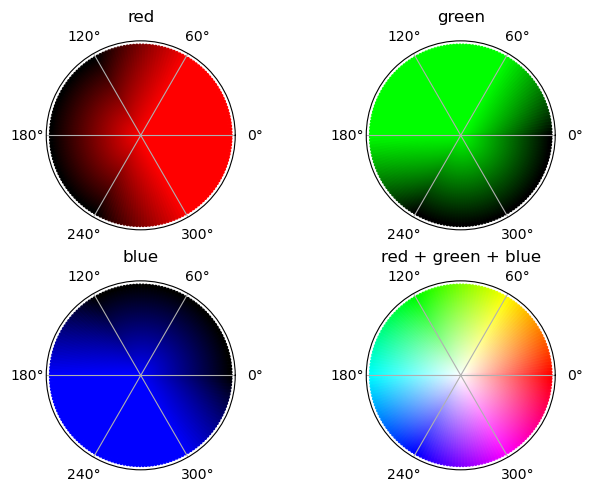

In [17]:
hl = np.linspace(0, 360, 180)
sl = np.linspace(0, 1, 60)

hh, ss = (x.reshape(-1) for x in np.meshgrid(hl, sl, indexing='ij'))
rr, gg, bb = np.vectorize(lambda h, s : rgb_from_hsv(h, s, 1))(hh, ss)
cs = [
    np.column_stack((rr, np.zeros_like(rr), np.zeros_like(rr))),
    np.column_stack((np.zeros_like(gg), gg, np.zeros_like(gg))),
    np.column_stack((np.zeros_like(bb), np.zeros_like(bb), bb)),
    np.column_stack((rr, gg, bb))
]

def do_something(ax, colors, title):
    ax.set_rticks([])
    ax.set_xticks(np.deg2rad(np.linspace(0, 360, 6, endpoint=False)))
    ax.scatter(np.deg2rad(hh), ss, c = colors, s = 3)
    ax.set_aspect(1)
    ax.set_title(title)

fig, axs = plt.subplots(2, 2,layout="constrained", subplot_kw = {'projection' : 'polar'})
do_something(axs[0,0], cs[0], 'red')
do_something(axs[0,1], cs[1], 'green')
do_something(axs[1,0], cs[2], 'blue')
do_something(axs[1,1], cs[3], 'red + green + blue')

We may also take section of HSV graph at $s=1$ to make a flat rectangular subspace of HSV color space

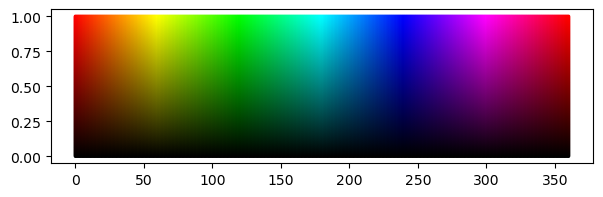

In [18]:
hl = np.linspace(0, 360, 361)
vl = np.linspace(0, 1, 201)

hh, vv = (a.reshape(-1) for a in np.meshgrid(hl, vl, indexing='ij'))
rr, gg, bb = np.vectorize(lambda h, v: rgb_from_hsv(h, 1, v), otypes=[float,float,float])(hh, vv)
cs = np.column_stack((rr, gg, bb))

fig, ax = plt.subplots()
fig.set_size_inches(7, 2)
ax.scatter(hh, vv, c=cs, s=2)

In fact, nothing really stops us from picking any saturation value in $[0, 1]$:

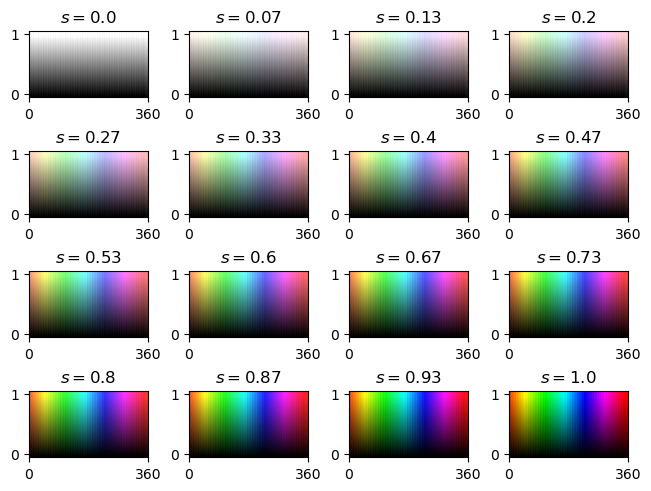

In [19]:
hl = np.linspace(0, 360, 50)
vl = np.linspace(0, 1, 50)

hh, vv = (a.reshape(-1) for a in np.meshgrid(hl, vl, indexing='ij'))

fig, axs = plt.subplots(4, 4, layout="constrained")

def hsv_section(ax, s):
    rr, gg, bb = np.vectorize(lambda h, v: rgb_from_hsv(h, s, v), otypes=[float,float,float])(hh, vv)
    cs = np.column_stack((rr, gg, bb))
    ax.scatter(hh, vv, c=cs)
    ax.set_title(f'$s={round(s,2)}$')
    ax.set_xlim(left=0, right=360)
    ax.set_xticks([0, 360])
    

for i in range(4):
    for j in range(4):
        hsv_section(axs[i,j], (i*4+j)/15)

The rendered surface is intersection between side of radius $s$ cylinder with the hsv cylinder volume. Can you see that?

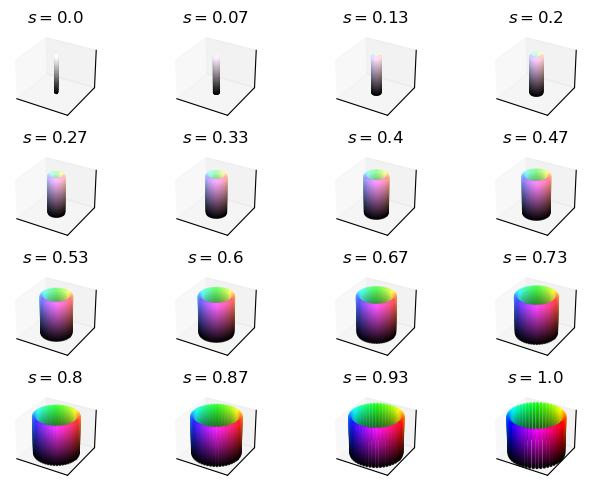

In [20]:
hl = np.linspace(0, 360, 50)
vl = np.linspace(0, 1, 50)

hh, vv = (a.reshape(-1) for a in np.meshgrid(hl, vl, indexing='ij'))

fig, axs = plt.subplots(4, 4, layout="constrained", subplot_kw=dict(projection='3d'))

for i in range(4):
    for j in range(4):
        s = (i*4+j)/15
        xx, yy, zz = np.vectorize(lambda h, v: xyz_from_hsv(h, s, v), otypes=[float,float,float])(hh, vv)
        rr, gg, bb = np.vectorize(lambda h, v: rgb_from_hsv(h, s, v), otypes=[float,float,float])(hh, vv)
        cs = np.column_stack((rr, gg, bb))
        ax = axs[i,j]
        ax.set_xlim(left=-1, right=1)
        ax.set_ylim(bottom=-1, top=1)
        ax.set_zlim(bottom=0, top=1)
        ax.scatter(xx, yy, zz, c=cs, s = 2)
        ax.set_title(f'$s={round(s,2)}$')
        ax.xaxis.set_major_locator(ticker.NullLocator())
        ax.yaxis.set_major_locator(ticker.NullLocator())
        ax.zaxis.set_major_locator(ticker.NullLocator())

We can also take section with set $h$ value:

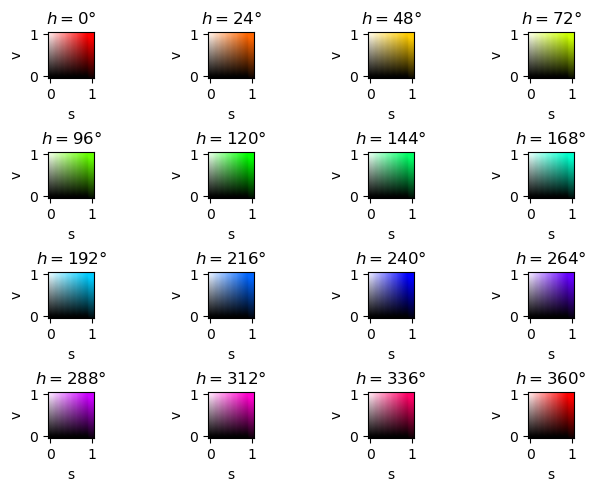

In [21]:
sl = np.linspace(0, 1, 50)
vl = np.linspace(0, 1, 50)

ss, vv = (a.reshape(-1) for a in np.meshgrid(sl, vl, indexing='ij'))

fig, axs = plt.subplots(4, 4, layout="constrained")
for i in range(4):
    for j in range(4):
        ax = axs[i,j]
        h = (i*4+j)/15*360
        rr, gg, bb = np.vectorize(lambda s, v: rgb_from_hsv(h, s, v), otypes=[float,float,float])(ss, vv)
        cs = np.column_stack((rr, gg, bb))
        ax.set_title(f'$h={round(h)}\degree$')
        ax.set_aspect(1)
        ax.scatter(ss, vv, c=cs)
        ax.set_xlabel('s')
        ax.set_ylabel('v')

The rendered surface is half of the vertical section of the HSV cylinder volume:

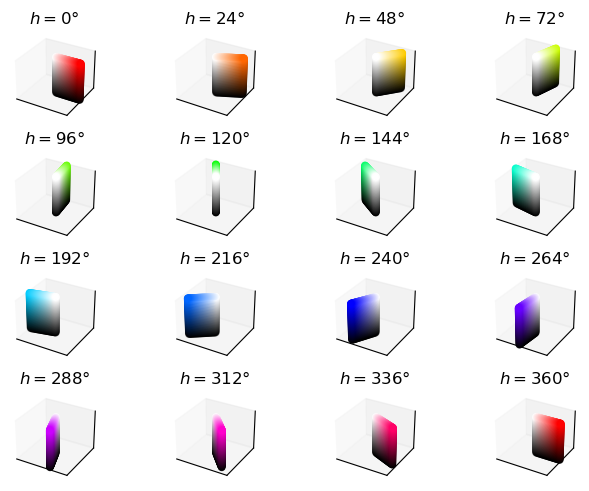

In [22]:
sl = np.linspace(0, 1, 50)
vl = np.linspace(0, 1, 50)

ss, vv = (a.reshape(-1) for a in np.meshgrid(sl, vl, indexing='ij'))

fig, axs = plt.subplots(4, 4, layout="constrained", subplot_kw=dict(projection='3d'))
for i in range(4):
    for j in range(4):
        ax = axs[i,j]
        h = (i*4+j)/15*360
        xx, yy, zz = np.vectorize(lambda s, v: xyz_from_hsv(h, s, v), otypes=[float,float,float])(ss, vv)
        rr, gg, bb = np.vectorize(lambda s, v: rgb_from_hsv(h, s, v), otypes=[float,float,float])(ss, vv)
        cs = np.column_stack((rr, gg, bb))
        ax.set_title(f'$h={round(h)}\degree$')
        ax.scatter(xx, yy, zz, c=cs)
        ax.set_xlim(left=-1, right=1)
        ax.set_ylim(bottom=-1, top=1)
        ax.set_zlim(bottom=0, top=1)
        ax.xaxis.set_major_locator(ticker.NullLocator())
        ax.yaxis.set_major_locator(ticker.NullLocator())
        ax.zaxis.set_major_locator(ticker.NullLocator())

It is possible to get whole section instead of half section. That is, we combine half sections at $h$ and $h+180$:

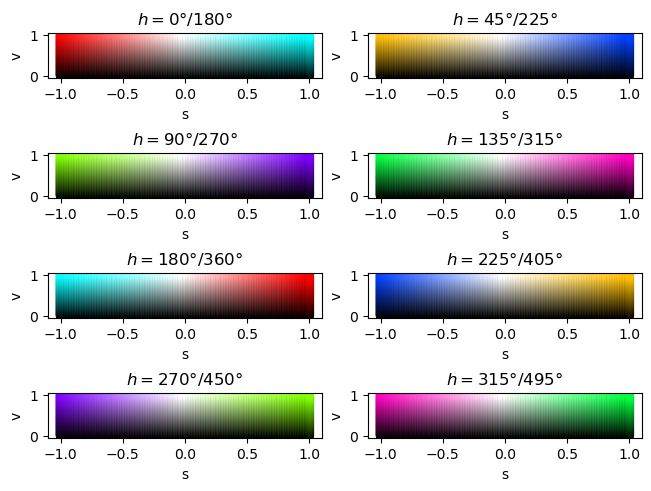

In [23]:
sl = np.linspace(0, 1, 50)
vl = np.linspace(0, 1, 50)

ss, vv = (a.reshape(-1) for a in np.meshgrid(sl, vl, indexing='ij'))

fig, axs = plt.subplots(4, 2, layout="constrained")

for i in range(4):
    for j in range(2):
        h1 = i * 90 + j * 45
        h2 = h1 + 180
        ax = axs[i,j]
        rr, gg, bb = np.vectorize(lambda s, v: rgb_from_hsv(h1, 1 - s, v), otypes=[float,float,float])(ss, vv)
        rr2, gg2, bb2 = np.vectorize(lambda s, v: rgb_from_hsv(h2, s, v), otypes=[float,float,float])(ss, vv)
        cs = np.vstack((np.column_stack((rr, gg, bb)), np.column_stack((rr2,gg2,bb2))))
        ax.scatter(np.vstack((ss-1, ss)), np.vstack((vv,vv)), c=cs)
        ax.set_xlabel('s')
        ax.set_ylabel('v')
        ax.set_title(f'$h={round(h1,2)}\degree / {round(h2,2)}\degree$')

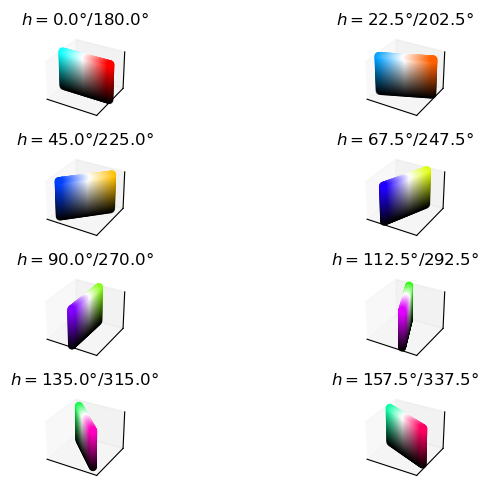

In [24]:
sl = np.linspace(0, 1, 50)
vl = np.linspace(0, 1, 50)

ss, vv = (a.reshape(-1) for a in np.meshgrid(sl, vl, indexing='ij'))

fig, axs = plt.subplots(4, 2, layout="constrained", subplot_kw=dict(projection='3d'))

for i in range(4):
    for j in range(2):
        h1 = i * 45 + j * 22.5
        h2 = h1 + 180
        ax = axs[i,j]
        xx, yy, zz = np.vectorize(lambda s, v: xyz_from_hsv(h1, 1 - s, v), otypes=[float,float,float])(ss, vv)
        xx2, yy2, zz2 = np.vectorize(lambda s, v: xyz_from_hsv(h2, s, v), otypes=[float,float,float])(ss, vv)
        rr, gg, bb = np.vectorize(lambda s, v: rgb_from_hsv(h1, 1 - s, v), otypes=[float,float,float])(ss, vv)
        rr2, gg2, bb2 = np.vectorize(lambda s, v: rgb_from_hsv(h2, s, v), otypes=[float,float,float])(ss, vv)
        cs = np.vstack((np.column_stack((rr, gg, bb)), np.column_stack((rr2,gg2,bb2))))
        ax.set_xlim(left=-1, right=1)
        ax.set_ylim(bottom=-1, top=1)
        ax.set_zlim(bottom=0, top=1)
        ax.xaxis.set_major_locator(ticker.NullLocator())
        ax.yaxis.set_major_locator(ticker.NullLocator())
        ax.zaxis.set_major_locator(ticker.NullLocator())
        ax.set_title(f'$h={round(h1,2)}\degree / {round(h2,2)}\degree$')
        ax.scatter(
            np.vstack((xx, xx2)),
            np.vstack((yy, yy2)),
            np.vstack((zz, zz2)),
            c=cs
        )